#### <center> Implemetation du algorithme de Prim

##### importation des bibliotheque

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

##### implementation de l'algorithme de Prim

In [38]:
def Prim(graphe):
    # Créer une liste de tous les nœuds du graphe
    nodes = list(graphe.nodes)

    # Initialiser les listes pour suivre les nœuds visités, les distances minimales et les parents
    visite = [0]*len(nodes)
    dist = [float('inf')]*len(nodes)
    parent = [-1]*len(nodes)

    # Définir la distance du premier nœud à 0
    dist[0] = 0

    # Parcourir tous les nœuds du graphe
    for _ in range(len(nodes)):
        # Trouver le nœud non visité avec la distance minimale
        u = dist.index(min(dist))

        # Marquer ce nœud comme visité
        visite[u] = True

        # Parcourir tous les nœuds voisins du nœud actuel
        for v in range(len(nodes)):
            # Si le nœud voisin n'a pas été visité et que la distance est inférieure à la distance actuelle
            if graphe.has_edge(nodes[u], nodes[v]) and visite[v] == False and dist[v] > graphe[nodes[u]][nodes[v]]['weight']:
                # Mettre à jour la distance et le parent du nœud voisin
                dist[v] = graphe[nodes[u]][nodes[v]]['weight']
                parent[v] = u

        # Marquer la distance du nœud actuel comme infinie pour le prochain tour
        dist[u] = float('inf')

    # Créer une liste pour stocker l'arbre couvrant minimal
    acm = []

    # Parcourir tous les nœuds sauf le premier
    for i in range(1, len(nodes)):
        # Ajouter l'arête du parent au nœud actuel à l'arbre couvrant minimal
        acm.append((nodes[parent[i]], nodes[i], {'weight': graphe[nodes[i]][nodes[parent[i]]]['weight']}))

    # Retourner l'arbre couvrant minimal
    return acm

##### On crée un graphe pour tester l'algorithme 

In [39]:

g = nx.Graph()

# On ajoute des arêtes au graphe (nœud1, nœud2, poids)
g.add_edge('A', 'B', weight=1)
g.add_edge('B', 'C', weight=2)
g.add_edge('C', 'D', weight=12)
g.add_edge('D', 'A', weight=4)
g.add_edge('A', 'C', weight=5)
g.add_edge('B', 'D', weight=6)

##### On crée un nouveau graphe pour l'arbre minimal couvrant

In [40]:
acm = Prim(g)
acm_g = nx.Graph()
acm_g.add_edges_from(acm)

##### On affiche le graphe original

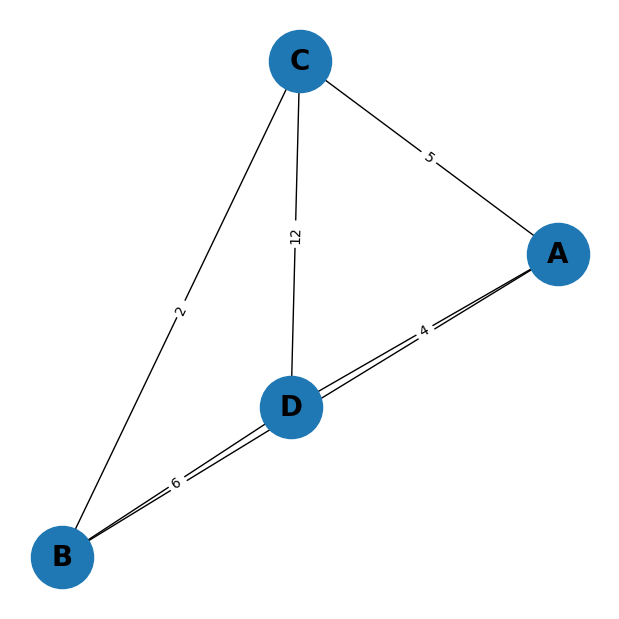

In [41]:
plt.figure(figsize=(6, 6))  # On cree une nouveau figure
pos = nx.spring_layout(g)  # On calcule la position des noued
nx.draw(g, pos, with_labels=True, node_size=2000, font_size=20, font_weight='bold')

# On ajoute les cout des noued a la figure
edge_labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=edge_labels)

plt.show()  # On affiche l'image

##### On affiche l'arbre couvrant minimal

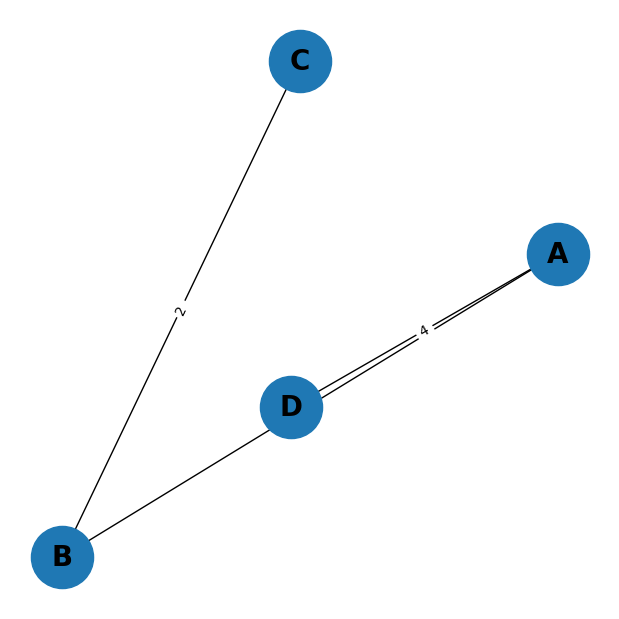

In [42]:

plt.figure(figsize=(6, 6)) 
nx.draw(acm_g, pos, with_labels=True, node_size=2000, font_size=20, font_weight='bold')

edge_labels = nx.get_edge_attributes(acm_g, 'weight')
nx.draw_networkx_edge_labels(acm_g, pos=pos, edge_labels=edge_labels)

plt.show() 